# a) Compare Convolutional Neural Networks with Feedforward Neural Network

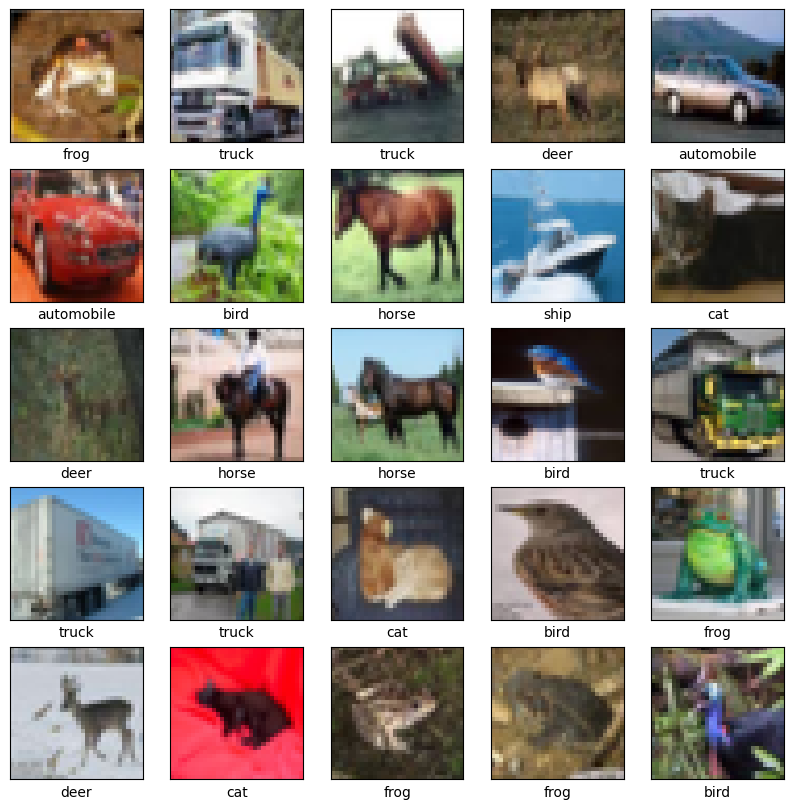

Epoch 1/5
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5081 - accuracy: 0.4505 - val_loss: 1.2229 - val_accuracy: 0.5626
Epoch 2/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1499 - accuracy: 0.5933 - val_loss: 1.0902 - val_accuracy: 0.6144
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0051 - accuracy: 0.6444 - val_loss: 1.0736 - val_accuracy: 0.6259
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9056 - accuracy: 0.6812 - val_loss: 0.9834 - val_accuracy: 0.6627
Epoch 5/5
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8355 - accuracy: 0.7085 - val_loss: 0.9921 - val_accuracy: 0.6509
313/313 - 4s - loss: 0.9921 - accuracy: 0.6509 - 4s/epoch - 14ms/step
Test accuracy: 0.6509000062942505


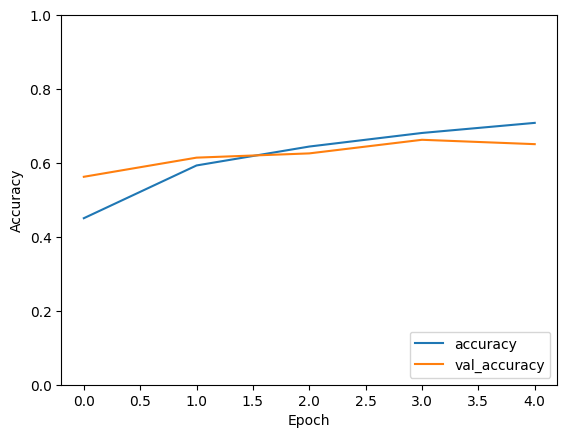

In [ ]:
## Convolutional Neural Networks

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to the range [0, 1] by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verify the data by plotting the first 25 images from the training set with their labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure of size 10x10
plt.figure(figsize=(10, 10))

# Loop through the first 25 images in the training set
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid of subplots
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid lines
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # Display the image in the subplot
    plt.xlabel(class_names[y_train[i][0]])  # Set the label for each image based on the class name
plt.show()  # Display the plot

# Build the Convolutional Neural Network (CNN) model
model = models.Sequential()

# Add the first convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and input shape of (32, 32, 3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add a second convolutional layer with 64 filters and 3x3 kernel size
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add a third convolutional layer with 64 filters and 3x3 kernel size
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the convolutional layers to feed into the fully connected layers
model.add(layers.Flatten())

# Add a dense (fully connected) layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add the output dense layer with 10 units (one for each class in CIFAR-10)
model.add(layers.Dense(10))

# Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with the training data, for 5 epochs, and validate it with the test data
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test set and print the test accuracy
test_loss, cnn_test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {cnn_test_acc}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


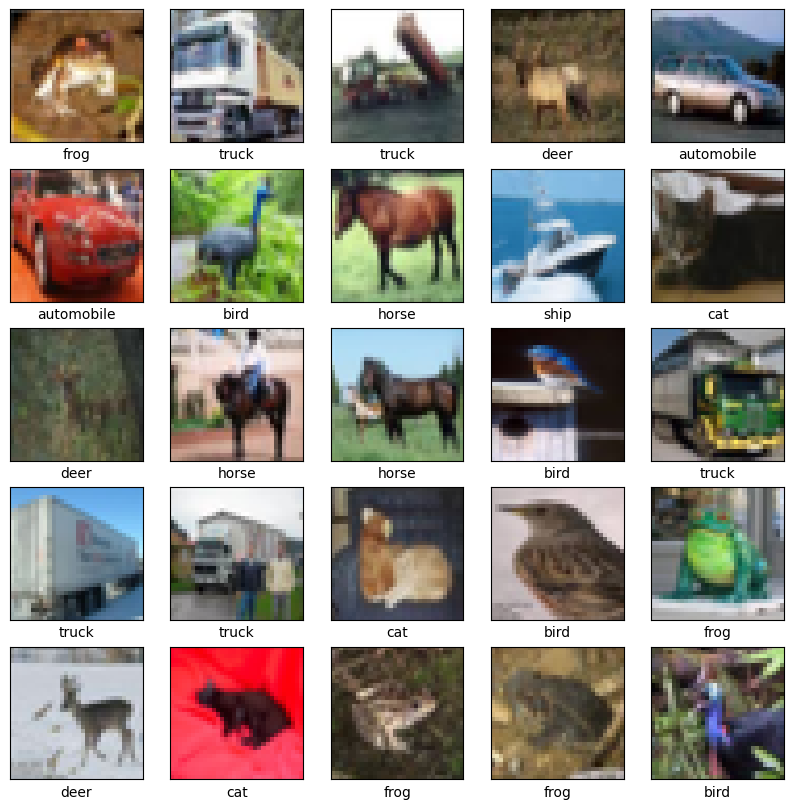

Epoch 1/5
1563/1563 [==============================] - 42s 26ms/step - loss: 1.8639 - accuracy: 0.3217 - val_loss: 1.6697 - val_accuracy: 0.4033
Epoch 2/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.6791 - accuracy: 0.3944 - val_loss: 1.6757 - val_accuracy: 0.3864
Epoch 3/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5906 - accuracy: 0.4269 - val_loss: 1.5639 - val_accuracy: 0.4400
Epoch 4/5
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5341 - accuracy: 0.4507 - val_loss: 1.5058 - val_accuracy: 0.4631
Epoch 5/5
1563/1563 [==============================] - 40s 25ms/step - loss: 1.4974 - accuracy: 0.4652 - val_loss: 1.5625 - val_accuracy: 0.4454
313/313 - 2s - loss: 1.5625 - accuracy: 0.4454 - 2s/epoch - 5ms/step
Test accuracy: 0.4453999996185303


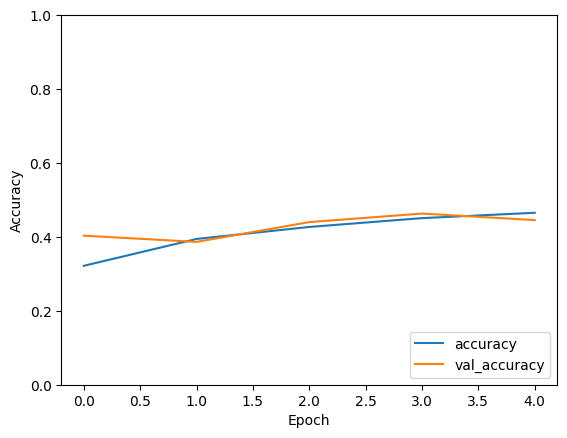

In [ ]:
## Feedforward Neural Network (FFNN)

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
# CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes,
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to the range [0, 1] by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images for FFNN
# FFNNs require 1D input, so we reshape the 3D image data to 1D vectors.
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Verify the data by plotting the first 25 images from the training set with their labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a figure of size 10x10
plt.figure(figsize=(10, 10))

# Loop through the first 25 images in the training set
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid of subplots
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Remove grid lines
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # Display the image in the subplot
    plt.xlabel(class_names[y_train[i][0]])  # Set the label for each image based on the class name
plt.show()  # Display the plot

# Build the Feedforward Neural Network (FFNN) model
model = models.Sequential()

# Add the first dense layer with 512 units, ReLU activation, and input shape equal to the flattened image size
model.add(layers.Dense(512, activation='relu', input_shape=(x_train_flat.shape[1],)))

# Add a second dense layer with 256 units and ReLU activation
model.add(layers.Dense(256, activation='relu'))

# Add a third dense layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add the output dense layer with 10 units (one for each class in CIFAR-10)
model.add(layers.Dense(10))

# Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with the training data, for 5 epochs, and validate it with the test data
history_ffnn = model.fit(x_train_flat, y_train, epochs=5,
                         validation_data=(x_test_flat, y_test))

# Evaluate the model on the test set and print the test accuracy
test_loss, ffnn_test_acc = model.evaluate(x_test_flat, y_test, verbose=2)
print(f"Test accuracy: {ffnn_test_acc}")

# Plot training and validation accuracy over epochs
plt.plot(history_ffnn.history['accuracy'], label='accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(f"CNN Test accuracy: {cnn_test_acc}")
print(f"FFNN Test accuracy: {ffnn_test_acc}")


CNN Test accuracy: 0.6509000062942505
FFNN Test accuracy: 0.4453999996185303


# b) Applying Overfitting Handling Techniques to CNN and FFNN Models (Using Early Stopping)

CNN Model with Overfitting Handling



Epoch 1/5
782/782 [==============================] - 61s 77ms/step - loss: 1.5711 - accuracy: 0.4256 - val_loss: 1.3414 - val_accuracy: 0.5097
Epoch 2/5
782/782 [==============================] - 60s 76ms/step - loss: 1.2068 - accuracy: 0.5710 - val_loss: 1.1238 - val_accuracy: 0.5995
Epoch 3/5
782/782 [==============================] - 60s 77ms/step - loss: 1.0550 - accuracy: 0.6258 - val_loss: 1.0178 - val_accuracy: 0.6466
Epoch 4/5
782/782 [==============================] - 60s 76ms/step - loss: 0.9582 - accuracy: 0.6630 - val_loss: 0.9994 - val_accuracy: 0.6489
Epoch 5/5
782/782 [==============================] - 61s 78ms/step - loss: 0.8805 - accuracy: 0.6917 - val_loss: 0.9410 - val_accuracy: 0.6672
313/313 - 4s - loss: 0.9410 - accuracy: 0.6672 - 4s/epoch - 14ms/step
CNN Test accuracy: 0.6672000288963318


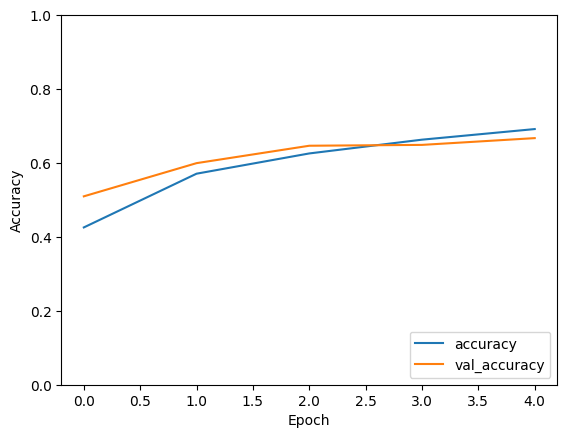

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and normalize the CIFAR-10 dataset
# CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
# (x_train, y_train) is the training set, and (x_test, y_test) is the test set.
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to the range [0, 1] by dividing by 255.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the Convolutional Neural Network (CNN) model
cnn_model = models.Sequential()

# Add the first convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and input shape of (32, 32, 3)
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max-pooling layer with 2x2 pool size to reduce the spatial dimensions
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer with 2x2 pool size
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the convolutional layers to create a 1D vector
cnn_model.add(layers.Flatten())

# Add a dense (fully connected) layer with 64 units and ReLU activation
cnn_model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (one for each class)
cnn_model.add(layers.Dense(10))

# Compile the model
# - Adam optimizer is used for optimization.
# - Sparse categorical cross-entropy loss is used for the multi-class classification task.
# - The metric used to evaluate the model is accuracy.
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Early stopping callback
# EarlyStopping monitors the validation loss and stops training if it doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
# Train the model for 5 epochs with a batch size of 64
# Use the training data for training and the test data for validation
# Apply the early stopping callback during training
history_cnn = cnn_model.fit(x_train, y_train, epochs=5, batch_size=64,
                            validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model
# Evaluate the trained model on the test set to determine its performance
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"CNN Test accuracy: {test_acc_cnn}")

# Plot training and validation accuracy
# Plot the accuracy and validation accuracy over the training epochs
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.ylim([0, 1])  # Set the y-axis limits from 0 to 1
plt.legend(loc='lower right')  # Place the legend at the lower right
plt.show()  # Display the plot


FFNN Model with Overfitting Handling



Epoch 1/5
782/782 [==============================] - 28s 34ms/step - loss: 2.5763 - accuracy: 0.1808 - val_loss: 2.1423 - val_accuracy: 0.2525
Epoch 2/5
782/782 [==============================] - 26s 33ms/step - loss: 2.1526 - accuracy: 0.2075 - val_loss: 2.0822 - val_accuracy: 0.2357
Epoch 3/5
782/782 [==============================] - 27s 34ms/step - loss: 2.0814 - accuracy: 0.2222 - val_loss: 2.0227 - val_accuracy: 0.2529
Epoch 4/5
782/782 [==============================] - 24s 31ms/step - loss: 2.0694 - accuracy: 0.2261 - val_loss: 2.0169 - val_accuracy: 0.2791
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 2.0576 - accuracy: 0.2305 - val_loss: 2.0027 - val_accuracy: 0.2836
313/313 - 2s - loss: 2.0027 - accuracy: 0.2836 - 2s/epoch - 5ms/step
FFNN Test accuracy: 0.28360000252723694


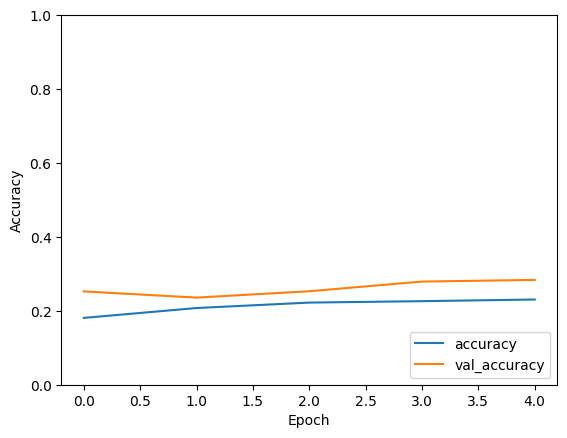

In [ ]:
# Flatten the images for FFNN

# Reshape the training and test images into a 2D array where each image is a single row vector
# This is necessary for feeding the images into a fully connected feedforward neural network
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Build the Feedforward Neural Network (FFNN) model
ffnn_model = models.Sequential()

# Add a dense layer with 512 units, ReLU activation, input shape matching the flattened image size
# Apply L2 regularization to prevent overfitting
ffnn_model.add(layers.Dense(512, activation='relu', input_shape=(x_train_flat.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# Add a dropout layer with a 50% dropout rate to prevent overfitting
ffnn_model.add(layers.Dropout(0.5))

# Add a dense layer with 256 units, ReLU activation, and L2 regularization
ffnn_model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# Add another dropout layer with a 50% dropout rate
ffnn_model.add(layers.Dropout(0.5))

# Add a dense layer with 128 units, ReLU activation, and L2 regularization
ffnn_model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# Add the output layer with 10 units, one for each class in CIFAR-10
ffnn_model.add(layers.Dense(10))

# Compile the model
# Use the Adam optimizer for optimization
# Use sparse categorical cross-entropy loss for multi-class classification
# Track accuracy as the evaluation metric
ffnn_model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Early stopping callback
# Monitor the validation loss and stop training if it doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
# Train the model for 5 epochs with a batch size of 64
# Use the training data for training and the test data for validation
# Apply the early stopping callback during training
history_ffnn = ffnn_model.fit(x_train_flat, y_train, epochs=5, batch_size=64,
                              validation_data=(x_test_flat, y_test), callbacks=[early_stopping])

# Evaluate the model
# Evaluate the trained model on the test set to determine its performance
test_loss_ffnn, test_acc_ffnn = ffnn_model.evaluate(x_test_flat, y_test, verbose=2)
print(f"FFNN Test accuracy: {test_acc_ffnn}")

# Plot training and validation accuracy
# Plot the accuracy and validation accuracy over the training epochs
plt.plot(history_ffnn.history['accuracy'], label='accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.ylim([0, 1])  # Set the y-axis limits from 0 to 1
plt.legend(loc='lower right')  # Place the legend at the lower right
plt.show()  # Display the plot


In [ ]:
print(f"CNN Test accuracy: {test_acc_cnn}")
print(f"FFNN Test accuracy: {test_acc_ffnn}")

CNN Test accuracy: 0.6672000288963318
FFNN Test accuracy: 0.28360000252723694


# c) Improving the Models with Feature Selection and Hyperparameter Optimization

Trial 3 Complete [00h 08m 26s]
val_accuracy: 0.6833999752998352

Best val_accuracy So Far: 0.7093999981880188
Total elapsed time: 00h 28m 28s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 96, the optimal dropout rate is 0.4,
and the optimal number of filters in the first convolutional layer is 32.

Epoch 1/5
1563/1563 [==============================] - 89s 56ms/step - loss: 1.5891 - accuracy: 0.4158 - val_loss: 1.2212 - val_accuracy: 0.5653
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1910 - accuracy: 0.5837 - val_loss: 1.0336 - val_accuracy: 0.6386
Epoch 3/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.0301 - accuracy: 0.6433 - val_loss: 0.9510 - val_accuracy: 0.6685
Epoch 4/5
1563/1563 [==============================] - 93s 59ms/step - loss: 0.9206 - accuracy: 0.6830 - val_loss: 0.9216 - val_accuracy: 0.6835
Epoch 5/5
1563/1563 [==============================] - 94s

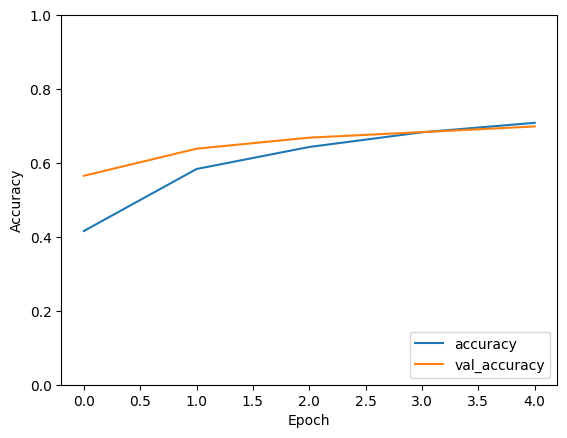

In [ ]:
# Import TensorFlow and necessary modules from the Keras API
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import the Keras Tuner library
import keras_tuner as kt

# Load and preprocess the CIFAR-10 dataset
# CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to the range [0, 1]
# This improves the training process by standardizing the input values.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the first 25 images from the training set along with their class names
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Disable grid lines
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # Display the image
    plt.xlabel(class_names[y_train[i][0]])  # Label the image with its class name
plt.show()

# Define a function to build the CNN model with hyperparameters
def build_model(hp):
    model = models.Sequential()

    # Add first Conv2D layer with hyperparameters for filters and kernel size
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),  # Hyperparameter for the number of filters
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),  # Hyperparameter for the kernel size
        activation='relu',  # Activation function
        input_shape=(32, 32, 3)  # Input shape for CIFAR-10 images
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Add MaxPooling layer to reduce spatial dimensions

    # Add second Conv2D layer with hyperparameters for filters and kernel size
    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),  # Hyperparameter for the number of filters
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),  # Hyperparameter for the kernel size
        activation='relu'  # Activation function
    ))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Add MaxPooling layer to reduce spatial dimensions

    # Add third Conv2D layer with hyperparameters for filters and kernel size
    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),  # Hyperparameter for the number of filters
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),  # Hyperparameter for the kernel size
        activation='relu'  # Activation function
    ))

    model.add(layers.Flatten())  # Flatten the output from convolutional layers to prepare for dense layers
    # Add a Dense layer with a hyperparameter for the number of units
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=16),  # Hyperparameter for the number of units
        activation='relu'  # Activation function
    ))
    # Add a Dropout layer with a hyperparameter for the dropout rate
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))  # Hyperparameter for the dropout rate
    model.add(layers.Dense(10))  # Add an output Dense layer with 10 units for the 10 classes

    # Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
    model.compile(optimizer='adam',  # Optimizer
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function
                  metrics=['accuracy'])  # Metric to monitor

    return model

# Initialize the Keras Tuner with a Random Search strategy
tuner = kt.RandomSearch(
    build_model,  # Function to build the model
    objective='val_accuracy',  # Objective to maximize validation accuracy
    max_trials=3,  # Conduct 3 different trials
    executions_per_trial=1,  # One execution per trial
    directory='my_dir',  # Directory to save the search results
    project_name='cifar10_tuning'  # Project name for this search
)


# Define an early stopping callback to stop training when validation loss stops improving
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the hyperparameter search
# Train for 5 epochs and use early stopping
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[stop_early])

# Retrieve the best hyperparameters found by the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('dense_units')}, the optimal dropout rate is {best_hps.get('dropout_rate')},
and the optimal number of filters in the first convolutional layer is {best_hps.get('conv_1_filter')}.
""")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the optimal hyperparameters
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Explanation:
1. Importing Libraries:

**kerastuner** is imported for hyperparameter tuning.

2. Building the Model (build_model function):

*  The function build_model takes hp
(hyperparameters) as an argument.

*  It creates a Sequential model and adds layers to it.

*  Conv2D layers are added with a tunable number of filters between 32 and 128, and a step size of 16.

*  MaxPooling2D layers are added to reduce the spatial dimensions.
Flatten layer is used to convert the 2D output of convolutional layers into a 1D vector.

*  Dense layer is added with a tunable number of units between 32 and 128, with L2 regularization to prevent overfitting.

*  Dropout layer is added to further reduce overfitting by randomly setting a fraction of input units to 0 during training.

*  Output Dense layer with 10 units (one for each class in CIFAR-10) is added.

*  The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric.

3. Initializing Hyperband Tuner:

kt.Hyperband is used to find the optimal hyperparameters.

The objective is to maximize validation accuracy.

max_epochs is set to 10 to limit the maximum number of epochs for each trial.

factor determines how the number of configurations decreases as the training progresses.

The results are saved in the specified directory and project name.

4. Early Stopping:

EarlyStopping callback monitors validation loss and stops training if it doesn't improve for 5 consecutive epochs.

5. Hyperparameter Search:

**tuner.search** starts the search process, training the model with various hyperparameters for up to 50 epochs.

Early stopping is applied to prevent overfitting.

6. Retrieving Best Hyperparameters:

tuner.get_best_hyperparameters retrieves the best hyperparameters found during the search.

7. Printing Best Hyperparameters:

The best values for the number of filters in each convolutional layer and the number of units in the dense layer are printed.

8. Building and Training the Model with Optimal Hyperparameters:

The model is rebuilt using the best hyperparameters.

The model is trained on the training data and validated on the test data for 10 epochs.